## Importing Functions

In [1]:
import pandas as pd
import requests
import tweepy
from bs4 import BeautifulSoup
import os
import json
import matplotlib.pyplot as plt
import numpy as np

## Gathering Data

In [2]:
wrt_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'data_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
image_df = pd.read_csv('data_files/image-predictions.tsv', sep='\t')

In [4]:
# consumer_key = 'SECRET'
# consumer_secret = 'SECRET'
# access_token = 'SECRET'
# access_secret = 'SECRET'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# with open('tweet_json.txt', 'w') as outfile:
#     for id in wrt_df.tweet_id:
#         try:
#             tweet = api.get_status(id, tweet_mode='extended')
#             print('Success')
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except:
#             print('Failed')
#             pass

In [5]:
tweets_df = pd.DataFrame(columns=['tweet_id', 'retweets', 'favorites'])
with open('tweet_json.txt') as json_file:
    for line in json_file:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweets_df = tweets_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], columns=['tweet_id', 'retweets', 'favorites']))

tweets_df = tweets_df.reset_index(drop=True)

## Assessing

In [6]:
wrt_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
921,756288534030475264,NaN,NaN,2016-07-22 00:43:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,None,None,pupper,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,None,None,None,None


In [7]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
471,675135153782571009,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,1,stove,0.587507,False,rotisserie,0.051713,False,microwave,0.020725,False
839,694356675654983680,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,hamster,0.429871,False,Pomeranian,0.144272,True,pretzel,0.127220,False
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False
1036,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True


In [8]:
tweets_df.sample(5)

,tweet_id,retweets,favorites
160,859851578198683649,3206,14412
849,761599872357261312,1151,4007
107,871032628920680449,3370,20853
1232,710588934686908417,1772,4349
1350,701952816642965504,979,3692


In [9]:
wrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null object
retweets     2331 non-null object
favorites    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [12]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
teddy                         18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [13]:
wrt_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
wrt_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Toby          7
Daisy         7
an            7
Bailey        7
Koda          6
Milo          6
Dave          6
Jax           6
Oscar         6
Rusty         6
Leo           6
Stanley       6
Jack          6
Scout         6
Bella         6
Sunny         5
           ... 
Combo         1
Shiloh        1
Simba         1
Sparky        1
Mo            1
Jeffrie       1
Einstein      1
Dudley        1
Lili          1
Hazel         1
Tedrick       1
Ben           1
Winifred      1
Nida          1
Georgie       1
Ambrose       1
Brudge        1
Mabel         1
Glacier       1
Cedrick       1
Lucky         1
Derby         1
Mike          1
Trigger       1
Holly         1
Jomathan      1
Molly         1
DonDon        1
Geno          1
Grady         1
Name: name, Length: 957,

### Quality:
#### wrt_df
- some rows are replies/retweets to tweets (not original tweets)
- extra not useful columns (retweeted_status_id etc.)
- timestamp should be datetype
- tweet_id is int64 but should be string
- incorrect dog names ('very', 'the' etc.)
- ratings are int64 but should be floats to preserve decimals

#### image_df
- tweet_id is int64 but should be string
- extra not useful columns 
- underscores in dog names that are 2 words

#### tweets_df
- tweet_id is int64 but should be string
- retweets and favorite counts are objects (strings)

### Tidiness:
- dog types (floofer etc.) should be a single column (columns headers should not be values)
- some rating numerator and denominator should be 1 combined value

## Cleaning

In [15]:
# Making copies of each df to clean with
wrt_df_copy = wrt_df.copy()
image_df_copy = image_df.copy()
tweets_df_copy = tweets_df.copy()

### Quality Issue 1: 

#### Some rows are replies/retweets to tweets (not original tweets)

#### Define

Remove rows that are replies and/or retweet

#### Code

In [16]:
wrt_df_copy = wrt_df_copy[wrt_df_copy.in_reply_to_status_id.isna()]
wrt_df_copy = wrt_df_copy[wrt_df_copy.in_reply_to_user_id.isna()]
wrt_df_copy = wrt_df_copy[wrt_df_copy.retweeted_status_id.isna()]
wrt_df_copy = wrt_df_copy[wrt_df_copy.retweeted_status_user_id.isna()]
wrt_df_copy = wrt_df_copy[wrt_df_copy.retweeted_status_timestamp.isna()]

wrt_df_copy = wrt_df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [17]:
wrt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Quality Issue 2: 

####  Extra not useful columns in wrt_df

#### Define

Drop columns that are not useful (source, URLs) in wrt_df

#### Code

In [18]:
wrt_df_copy = wrt_df_copy.drop(['source', 'expanded_urls'], axis=1)

#### Test

In [19]:
wrt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


### Quality Issue 3: 

#### Timestamp should be datetype

#### Define

Timestamp is currently object (string).  Should be datetype

#### Code

In [20]:
wrt_df_copy.timestamp = wrt_df_copy.timestamp.str.slice(0,-6)
wrt_df_copy.timestamp = pd.to_datetime(wrt_df_copy.timestamp, format='%Y-%m-%d %H:%M:%S')

#### Test

In [21]:
wrt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 180.2+ KB


### Quality Issue 4: 

#### Tweet_id is int64 but should be string

#### Define

Tweet IDs should all be string types to be able to join them

#### Code

In [22]:
wrt_df_copy.tweet_id = wrt_df_copy.tweet_id.astype(str)
image_df_copy.tweet_id = image_df_copy.tweet_id.astype(str)
tweets_df_copy.tweet_id = tweets_df_copy.tweet_id.astype(str)

#### Test

In [23]:
wrt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB


In [24]:
image_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [25]:
tweets_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null object
retweets     2331 non-null object
favorites    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


### Quality Issue 5: 

#### Extra not useful columns in image_df

#### Define

In image_df, jpg_url and img_num have no use and can be dropped

#### Code

In [26]:
image_df_copy = image_df_copy.drop(['jpg_url', 'img_num'], axis=1)

#### Test

In [27]:
image_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(4)
memory usage: 119.6+ KB


### Quality Issue 6: 

#### Incorrect dog names ('very', 'the' etc.)

#### Define

If dog name is present, there exists a capital letters.  Change all lowercase dog names to null

#### Code

In [28]:
wrt_df_copy.name = wrt_df_copy.name.mask(wrt_df_copy.name.str.match(r'^[a-z]+$')) 

#### Test

In [29]:
wrt_df_copy.name.value_counts()

None          603
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Tucker          9
Penny           9
Lola            8
Sadie           8
Winston         8
Toby            7
Daisy           7
Bo              6
Bailey          6
Oscar           6
Koda            6
Jax             6
Stanley         6
Bella           6
Chester         5
Dave            5
Buddy           5
Louis           5
Scout           5
Bentley         5
Leo             5
Rusty           5
Milo            5
Duke            4
Alfie           4
             ... 
Pablo           1
Jareld          1
Longfellow      1
Ashleigh        1
Lucky           1
Glacier         1
Strider         1
Lili            1
Adele           1
Miley           1
Pluto           1
Toffee          1
Mattie          1
Ferg            1
Marlee          1
Kane            1
Comet           1
Lorelei         1
Laela           1
Colin           1
Hazel           1
Tedrick         1
Ben             1
Winifred        1
Nida      

### Quality Issue 7: 

#### Underscores in dog names that are 2+ words

#### Define

Dog breeds with 2 names (ie. golden retriver) have an redundant underscore in the space

#### Code

In [30]:
image_df_copy['p1'] = image_df_copy.p1.str.replace('_', ' ')

#### Test

In [31]:
image_df_copy.p1.value_counts()

golden retriever             150
Labrador retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy poodle                    39
Pomeranian                    38
malamute                      30
cocker spaniel                30
French bulldog                26
Chesapeake Bay retriever      23
miniature pinscher            23
seat belt                     22
German shepherd               20
Siberian husky                20
Staffordshire bullterrier     20
web site                      19
Cardigan                      19
beagle                        18
Shetland sheepdog             18
Maltese dog                   18
Eskimo dog                    18
teddy                         18
Shih-Tzu                      17
Lakeland terrier              17
Rottweiler                    17
kuvasz                        16
Italian greyhound             16
          

### Quality Issue 8: 

#### Retweets and favorite counts are objects (strings) in tweets_df

#### Define

Retweets and favorites should be integers but are currently strings

#### Code

In [32]:
tweets_df_copy.retweets = tweets_df_copy.retweets.astype('int64')
tweets_df_copy.favorites = tweets_df_copy.favorites.astype('int64')

#### Test

In [33]:
tweets_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Quality Issue 9: 

#### Ratings are int64 but should be floats to rpeserve decimals

#### Define

Ratings will need to be re-extracted from the tweet text to keep the float datatype

#### Code

In [34]:
rating = wrt_df_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
rating = rating.astype('float')

In [35]:
wrt_df_copy.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)
wrt_df_copy = wrt_df_copy.join(rating)

#### Test

In [36]:
wrt_df_copy.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
13.50        1
0.00         1
24.00        1
84.00        1
420.00       1
1776.00      1
80.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
50.00        1
Name: rating_numerator, dtype: int64

### Tidiness Issue 1: 

#### Dog types (floofer etc.) should be a single column (columns headers should not be values)

#### Define

Create a single column with the dog type using the 4 dog type columns

#### Code

In [37]:
# Change none to ''
wrt_df_copy.doggo.replace('None', '', inplace=True)
wrt_df_copy.floofer.replace('None', '', inplace=True)
wrt_df_copy.pupper.replace('None', '', inplace=True)
wrt_df_copy.puppo.replace('None', '', inplace=True)

# merge into column
wrt_df_copy['dog_stage'] = wrt_df_copy.doggo + wrt_df_copy.floofer + wrt_df_copy.pupper + wrt_df_copy.puppo

# handle multiple stages
wrt_df_copy.loc[wrt_df_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
wrt_df_copy.loc[wrt_df_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'
wrt_df_copy.loc[wrt_df_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'multiple'

# handle missing values
wrt_df_copy.loc[wrt_df_copy.dog_stage == '', 'dog_stage'] = np.nan

#### Test

In [38]:
wrt_df_copy.dog_stage.value_counts()

pupper      221
doggo        72
puppo        23
multiple     11
floofer       9
Name: dog_stage, dtype: int64

### Tidiness Issue 2: 

#### Rating numerator and denominator should be 1 combined value

#### Define

Individually, numerator and denominator don't provide any insight.  Combine into 1 value

#### Code

In [39]:
wrt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
name                  1993 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
dog_stage             336 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 276.6+ KB


In [40]:
# Combining rating into single value
wrt_df_copy['rating'] = wrt_df_copy.rating_numerator / wrt_df_copy.rating_denominator
wrt_df_copy = wrt_df_copy.drop(['rating_denominator', 'rating_numerator'], axis=1)

#### Test

In [41]:
wrt_df_copy.rating.value_counts()

1.200000      490
1.000000      438
1.100000      418
1.300000      287
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
1.350000        1
3.428571        1
1.127000        1
0.636364        1
1.126000        1
177.600000      1
42.000000       1
0.975000        1
0.000000        1
0.818182        1
Name: rating, dtype: int64

## Merging into 1 dataset

In [42]:
# Merging df into single df on tweet_id
tweets_clean = wrt_df_copy

tweets_clean = tweets_clean.join(image_df_copy.set_index('tweet_id'), on='tweet_id')
tweets_clean = tweets_clean.join(tweets_df_copy.set_index('tweet_id'), on='tweet_id')

In [43]:
# Removing rows without image, prediction or retweets/favorites
tweets_clean = tweets_clean[tweets_clean.p1.notnull()]
tweets_clean = tweets_clean[tweets_clean.retweets.notnull()]

In [44]:
# Exporting to csv
tweets_clean.to_csv('twitter_archive_master.csv',index=False)

## Visualizing

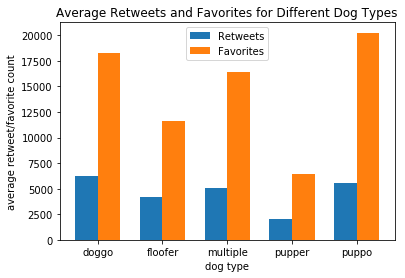

In [47]:
# Dog types average retweets and favorites

dog_stage_retweet = tweets_clean[tweets_clean.dog_stage.notnull()].groupby('dog_stage').mean().retweets;
dog_stage_favorites = tweets_clean[tweets_clean.dog_stage.notnull()].groupby('dog_stage').mean().favorites;

dsrf_x = np.arange(len(dog_stage_retweet))
width = 0.35

ax = plt.subplot(111)

ax.bar(dsrf_x - width/2, dog_stage_retweet, width, label='Retweets')
ax.bar(dsrf_x + width/2, dog_stage_favorites, width, label='Favorites')
ax.set_title('Average Retweets and Favorites for Different Dog Types')
ax.set_xlabel('dog type')
ax.set_xticks(dsrf_x)
ax.set_xticklabels(dog_stage_retweet.index)
ax.set_ylabel('average retweet/favorite count')
ax.legend()

plt.show()

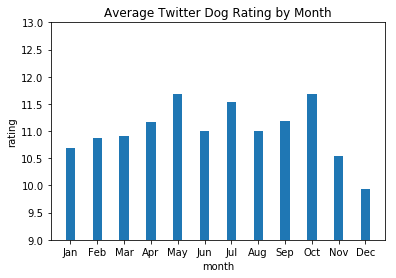

In [48]:
# Monthly influences on average ratings

tweets_clean_month = tweets_clean.drop(979)
tweets_clean_month = tweets_clean_month.groupby([tweets_clean_month.timestamp.dt.month]).agg({'rating':np.mean})

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
width = 0.35

ax = plt.subplot(111)

ax.bar(tweets_clean_month.index-1, tweets_clean_month.rating*10, width)
ax.set_title('Average Twitter Dog Rating by Month')
ax.set_xlabel('month')
ax.set_xticks(np.arange(len(month_labels)))
ax.set_xticklabels(month_labels)
ax.set_ylabel('rating')
ax.set_ylim([9,13])
plt.show()

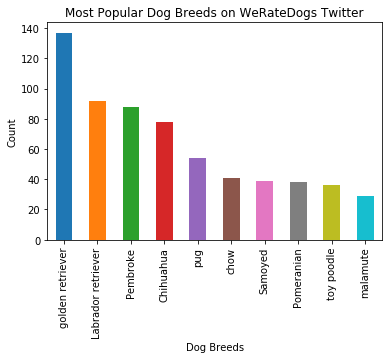

In [49]:
# Most popular dogs on twitter

most_popular_dogs = tweets_clean.p1.value_counts()[:10]

most_popular_dogs.plot(kind="bar")
plt.xlabel('Dog Breeds')
plt.ylabel('Count')
plt.title('Most Popular Dog Breeds on WeRateDogs Twitter')

plt.show()